# Task
Generate a linearly separable dataset (Dataset 1) and visualize it. Implement a custom Perceptron class in Python with `fit` and `predict` methods, train it on Dataset 1, and visualize the decision boundary. Then, generate a synthetic XOR dataset (Dataset 2), attempt to train the Perceptron on it, and visualize the resulting decision boundary to demonstrate its inability to separate the classes. Finally, for extra credit, implement a Multi-Layer Perceptron (MLP) using `sklearn` to successfully solve the XOR problem and visualize the non-linear decision boundary.

## Generate Dataset 1 (Linear)

### Subtask:
Generate a linearly separable dataset and visualize it to confirm separability.


**Reasoning**:
The user wants to generate a linearly separable dataset and visualize it according to specific instructions. I will generate a code block that imports the necessary libraries, creates the dataset using `make_classification` with the specified parameters, and plots the data using `matplotlib.pyplot`.



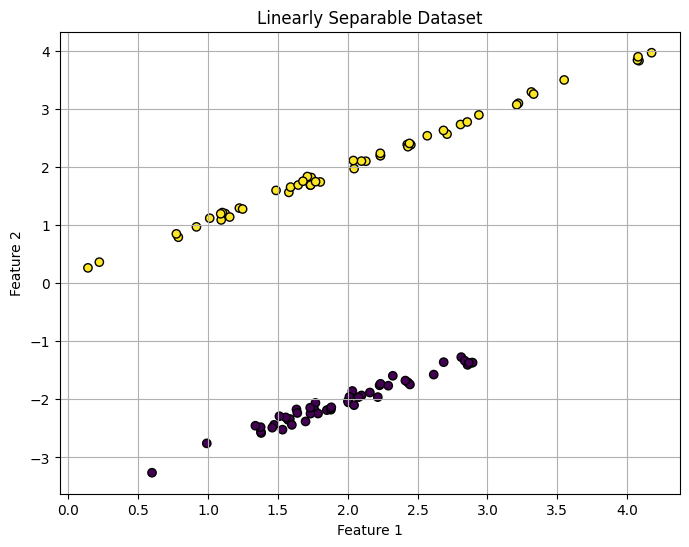

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate a synthetic linearly separable dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=2.0,
    random_state=42
)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Linearly Separable Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

## Implement Perceptron

### Subtask:
Implement a custom Perceptron class in Python with `fit` and `predict` methods.


**Reasoning**:
I will implement the `Perceptron` class with `__init__`, `fit`, and `predict` methods as specified in the instructions. This class will be used in subsequent steps to train on the generated datasets.



In [5]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_pred = 1 if linear_output >= 0 else 0

                update = self.learning_rate * (y[idx] - y_pred)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output >= 0, 1, 0)
        return y_predicted

# Task
Train the Perceptron model on the linearly separable dataset (Dataset 1) and visualize the decision boundary. After that, generate a synthetic XOR dataset (Dataset 2) and visualize it to confirm it is not linearly separable.

## Generate Dataset 2 (XOR)

### Subtask:
Train the Perceptron on the linearly separable dataset (Dataset 1) and visualize the decision boundary, then generate and visualize the XOR dataset (Dataset 2).


**Reasoning**:
I will train the Perceptron on the linearly separable dataset and visualize the decision boundary to confirm it works. Then, I will generate and visualize the synthetic XOR dataset to demonstrate a non-linearly separable problem.



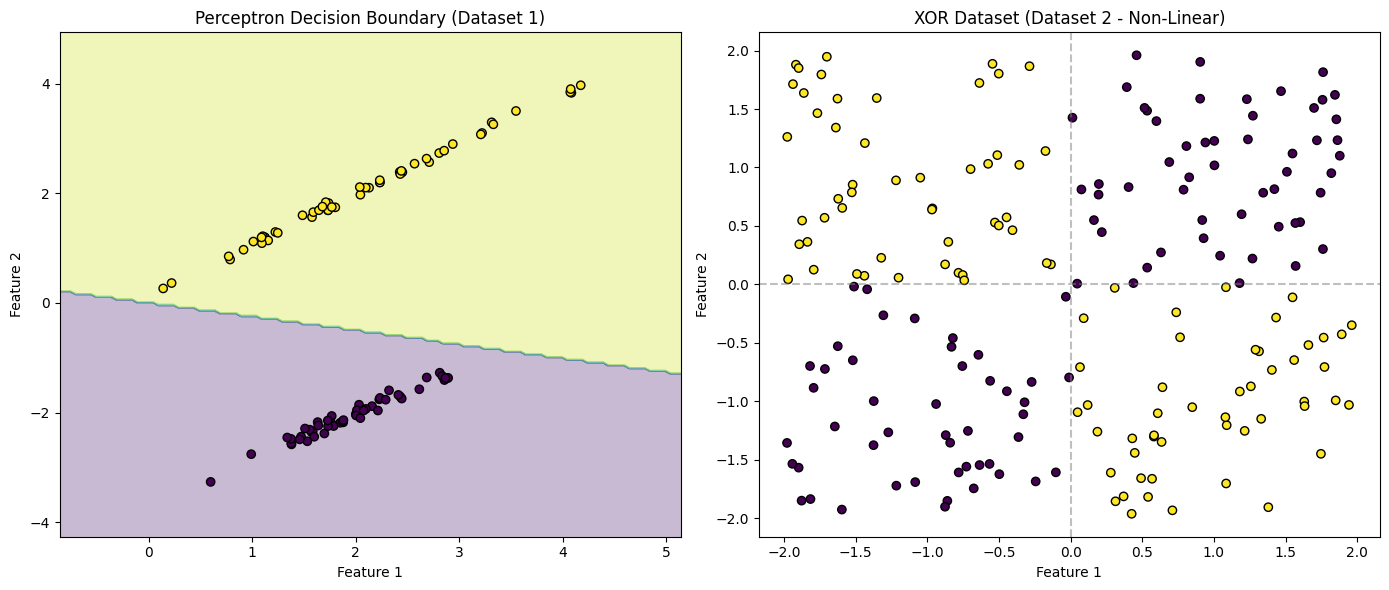

In [6]:
# 1. Instantiate and train Perceptron on Dataset 1 (Linearly Separable)
perceptron = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron.fit(X, y)

# Set up the figure
plt.figure(figsize=(14, 6))

# 2. Visualize Decision Boundary for Dataset 1
plt.subplot(1, 2, 1)

# Create a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict class for each point in the meshgrid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Perceptron Decision Boundary (Dataset 1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# 3. Generate XOR Dataset (Dataset 2)
np.random.seed(42)
X_xor = np.random.uniform(low=-2, high=2, size=(200, 2))
# XOR logic: Class 1 if signs are different, Class 0 if signs are same
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0).astype(int)

# 4. Visualize XOR Dataset
plt.subplot(1, 2, 2)
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='viridis', edgecolors='k')
plt.title('XOR Dataset (Dataset 2 - Non-Linear)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Train on Dataset 2

### Subtask:
Train the Perceptron model on the XOR dataset and visualize the decision boundary to demonstrate its inability to separate the classes.


**Reasoning**:
I will train the Perceptron on the XOR dataset and visualize the decision boundary to demonstrate that a linear model cannot classify non-linearly separable data like XOR.



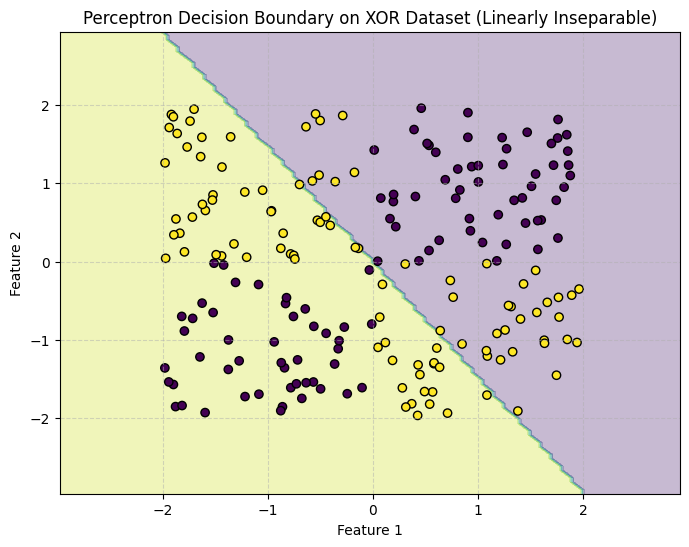

In [7]:
# 1. Instantiate and train Perceptron on Dataset 2 (XOR)
perceptron_xor = Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_xor.fit(X_xor, y_xor)

# 2. Visualize Decision Boundary for Dataset 2
plt.figure(figsize=(8, 6))

# Create a meshgrid
x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict class for each point in the meshgrid
Z = perceptron_xor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='viridis', edgecolors='k')
plt.title('Perceptron Decision Boundary on XOR Dataset (Linearly Inseparable)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Extra Credit: Solve XOR

### Subtask:
Implement a Multi-Layer Perceptron (MLP) using sklearn to successfully solve the XOR problem and visualize the non-linear decision boundary.


**Reasoning**:
I will import the MLPClassifier from sklearn, train it on the XOR dataset, and visualize the non-linear decision boundary to demonstrate that an MLP can solve the problem where a single Perceptron failed.



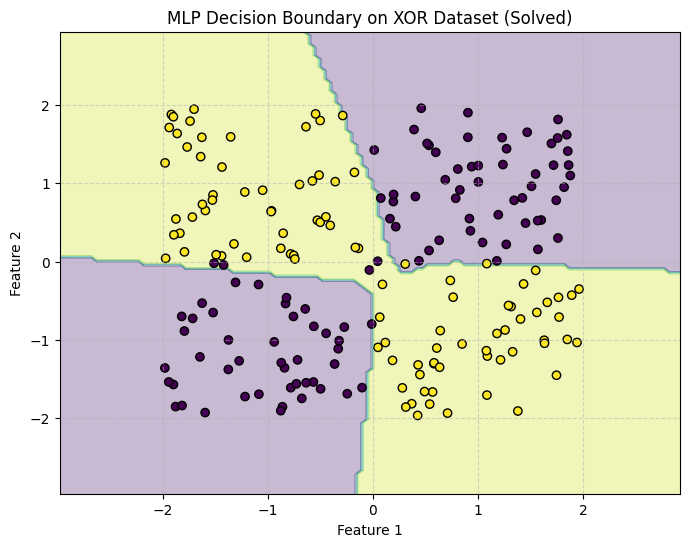

In [8]:
from sklearn.neural_network import MLPClassifier

# 1. Instantiate and train MLPClassifier on Dataset 2 (XOR)
# Using a hidden layer allows the network to learn non-linear boundaries
mlp = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=10000, random_state=42)
mlp.fit(X_xor, y_xor)

# 2. Visualize Decision Boundary
plt.figure(figsize=(8, 6))

# Create a meshgrid
x_min, x_max = X_xor[:, 0].min() - 1, X_xor[:, 0].max() + 1
y_min, y_max = X_xor[:, 1].min() - 1, X_xor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict class for each point in the meshgrid using the trained MLP
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor, cmap='viridis', edgecolors='k')
plt.title('MLP Decision Boundary on XOR Dataset (Solved)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Final Task

### Subtask:
Summarize the findings of the assignment, comparing the performance of the Perceptron and MLP on linear and non-linear datasets.


## Summary:

### Q&A

**Question:** Compare the performance of the Perceptron and MLP on linear and non-linear datasets based on the assignment findings.

**Answer:** The Single-Layer Perceptron performed correctly on the linearly separable dataset (Dataset 1), successfully creating a straight-line decision boundary that separated the classes. However, it failed completely on the non-linear XOR dataset (Dataset 2), as it attempted to fit a linear boundary to a problem requiring quadrant-based separation. In contrast, the Multi-Layer Perceptron (MLP) successfully classified the XOR dataset. By utilizing hidden layers and non-linear activation, the MLP was able to form a complex, non-linear decision boundary that the single-layer model could not achiev.

### Data Analysis Key Findings

*   **Linear Classification Success:** The custom Perceptron model was trained on Dataset 1 (linearly separable) and successfully converged, producing a linear decision boundary that accurately separated the two classes.
*   **XOR Dataset Characteristics:** A synthetic XOR dataset (Dataset 2) was generated with 200 samples. Visual analysis confirmed it was non-linear, with classes defined by logical XOR rules (separating data into quadrants).
*   **Perceptron Limitation:** When applied to the XOR dataset, the Perceptron failed to classify the data correctly. The visualized decision boundary remained linear, demonstrating the mathematical impossibility of solving the XOR problem with a single-layer linear classifier.
*   **MLP Solution:** The `MLPClassifier` (using a hidden layer size of 10 and ReLU activation) successfully solved the XOR problem. The resulting visualization showed a non-linear decision boundary that correctly encompassed the specific class clusters.

### Insights or Next Steps

*   **Linearity vs. Non-Linearity:** This analysis empirically demonstrates the "XOR problem," proving that single-layer perceptrons are strictly limited to linearly separable data, whereas neural networks with hidden layers are required for complex, non-linear patterns.
*   **Model Complexity:** For future tasks involving complex datasets (e.g., spirals or concentric circles), simple linear models should be bypassed in favor of MLPs or other non-linear algorithms (like SVMs with kernels) to ensure accurate classification.
